In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:34<00:00, 38.3MB/s]
100% 1.06G/1.06G [00:34<00:00, 33.0MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten ,BatchNormalization,Dropout
import cv2

In [ ]:
#genrator

train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize

def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_ds =  train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#creating model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds,verbose='auto')

Epoch 1/10
625/625 [==============================] - 77s 106ms/step - loss: 1.1234 - accuracy: 0.5566 - val_loss: 0.6306 - val_accuracy: 0.6498
Epoch 2/10
625/625 [==============================] - 65s 104ms/step - loss: 0.6114 - accuracy: 0.6630 - val_loss: 0.6119 - val_accuracy: 0.6484
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5629 - accuracy: 0.7150 - val_loss: 0.5602 - val_accuracy: 0.7128
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4944 - accuracy: 0.7632 - val_loss: 0.4680 - val_accuracy: 0.7646
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4374 - accuracy: 0.7969 - val_loss: 0.5708 - val_accuracy: 0.7570
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3778 - accuracy: 0.8371 - val_loss: 0.5430 - val_accuracy: 0.7304
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3231 - accuracy: 0.8687 - val_loss: 0.4254 - val_ac

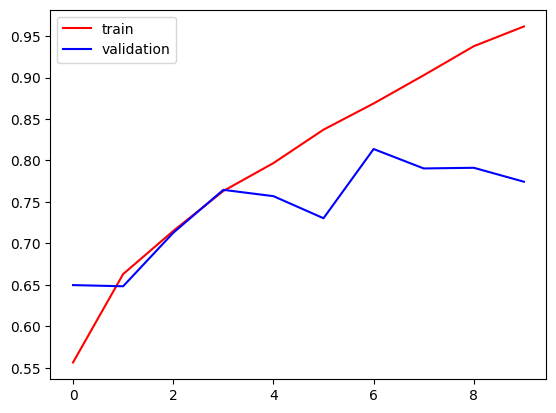

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

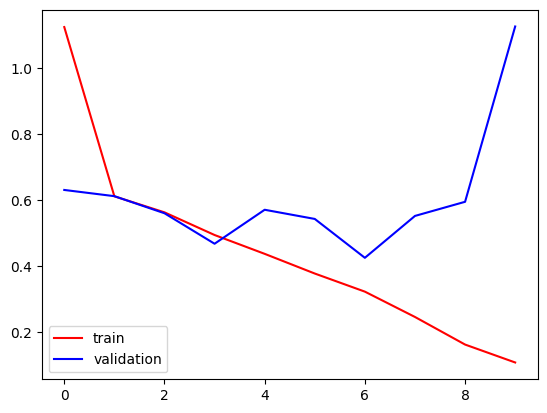

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_img=cv2.imread('cat.webp')

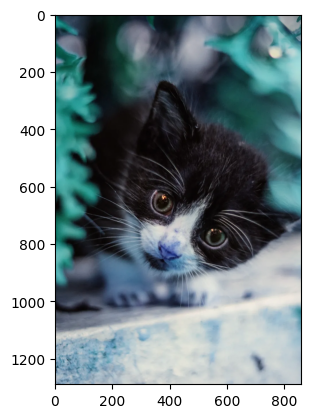

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
ans=model.predict(test_input)

1/1 [==============================] - 2s 2s/step


In [ ]:
ans[0][0]

In [ ]:
def predict_animal(ans):
  if(ans[0][0])==1:
    print('it is a dog')
  else:
    print('it is a cat')

In [ ]:
predict_animal(ans)

it is a cat
